In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math

### 題目:將影像的瑕疵特徵跟背景分離，留下越多越好

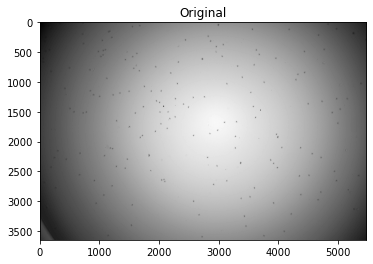

In [33]:
path='D:\\W_A1_0_3.jpg'
#轉灰階
im_gray = cv2.imread(path,0)
plt.imshow(im_gray,cmap='gray')
plt.title('Original')
plt.show()

In [3]:
#直方圖均衡化，效果不太好
def histogram_img(img):
    hist,bins=np.histogram(img.ravel(),256,[0,255])
    pdf=hist/img.size
    cdf=pdf.cumsum()
    
    #均衡化
    equ_value=np.around(cdf*255).astype('uint8')
    result =equ_value[img]
    
    plt.imsave('D://histogram.jpg',result)

#     return result

In [31]:
#gamma光線校正，輸入灰階影像
def gamma_img(img):
    #計算平均值
    mean=np.mean(img)
    #gamma計算公式
    gamma_calculate=math.log10(0.5)/math.log10(mean/255)
    #gamma變換
    gamma_table=[np.power(x/255.0, gamma_calculate)*255.0 for x in range(256)]
    gamma_table=np.round(np.array(gamma_table)).astype(np.uint8)
    result=cv2.LUT(img,gamma_table)
    cv2.imwrite('D://gamma.jpg', result)
    #return是numpy.ndarray
    return result

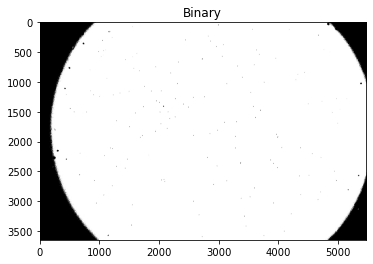

In [32]:
# 直方圖均衡化
# histogram_img(img_gray)
#gamma光線校正
im_gamma=gamma_img(im_gray)
# im_gamma= cv2.imread('D://gamma.jpg',0)
# im_array=np.array(im_gamma)

heigh,width=im_gamma.shape
ss=[]
for i in range(heigh):
    for j in range(width):
#         temp=img_gray.getpixel(x,y) #getpixel 取出每個pixel 
        z=im_gamma[i][j]
        if z > 80:
            z=255
        else:
            z=0
        ss.append(z)

        
#將二值後的資料轉Array        
ary = np.array(ss) 
# numpy轉成2維，原圖大小
pic=ary.reshape(heigh, width)

cv2.imwrite('D://result.jpg', pic)



#存檔
# plt.imsave('D://result.jpg',im_result)
plt.imshow(im_result)
plt.title('Binary')
plt.show()

## openCV Code

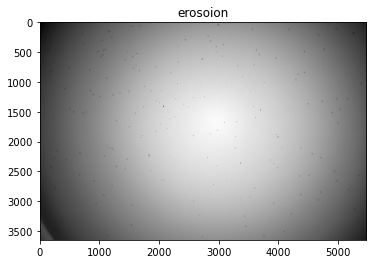

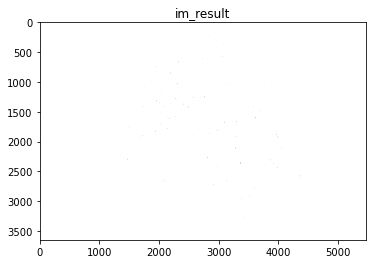

In [34]:

#做colsing
kernel_dilation=np.ones((5,5),np.uint8)
dilation=cv2.dilate(im_gray,kernel_dilation)
kernel_erosion=np.ones((3,3),np.uint8)
erosoion=cv2.erode(dilation,kernel_erosion)

cv2.imwrite('D:\\closing.jpg',erosoion)
plt.imshow(erosoion,cmap='gray')
plt.title('erosoion')
plt.show()

#做自適應二值化
erosion_gray=cv2.imread('D:\\closing.jpg',0)
im_adaptive=cv2.adaptiveThreshold(erosion_gray,255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY,5,3)
kernel_dilation=np.ones((3,3),np.uint8)
dilation=cv2.dilate(im_adaptive,kernel_dilation)

kernel_erosion=np.ones((3,3),np.uint8)
im_result=cv2.erode(dilation,kernel_erosion)

cv2.imwrite('D:\\im_result.jpg',im_result)
plt.imshow(im_result,cmap='gray')
plt.title('im_result')
plt.show()


In [21]:
print(type(pic))
print(type(im_bin))

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>
